<a href="https://colab.research.google.com/github/EMKEI9/BIG-DATA/blob/master/%EB%82%98%ED%98%BC%EC%9E%90%EC%B0%BE%EA%B8%B0_%EC%96%BC%EA%B5%B4%EC%B0%BE%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import dlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects

In [0]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')

In [0]:
def find_faces(img):
    dets = detector(img, 1)

    if len(dets) == 0:
        return np.empty(0), np.empty(0), np.empty(0)
    
    rects, shapes = [], []
    shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int)
    for k, d in enumerate(dets):
        rect = ((d.left(), d.top()), (d.right(), d.bottom()))
        rects.append(rect)

        shape = sp(img, d)
        
        # convert dlib shape to numpy array
        for i in range(0, 68):
            shapes_np[k][i] = (shape.part(i).x, shape.part(i).y)

        shapes.append(shape)
        
    return rects, shapes, shapes_np

def encode_faces(img, shapes):
    face_descriptors = []
    for shape in shapes:
        face_descriptor = facerec.compute_face_descriptor(img, shape)
        face_descriptors.append(np.array(face_descriptor))

    return np.array(face_descriptors)

In [12]:
img_paths = {
    'hyejin': 'hyejin.jpg',
    'hyunmoo': 'hyunmoo.jpg',
    'narae': 'narae.jpg',
    'solbee': 'solbee.jpg',
    'siun': 'siun.jpg'
}

descs = {
    'hyejin': None,
    'hyunmoo': None,
    'narae': None,
    'solbee': None,
    'siun': None
}

for name, img_path in img_paths.items():
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    _, img_shapes, _ = find_faces(img_rgb)
    descs[name] = encode_faces(img_rgb, img_shapes)[0]

np.save('descs.npy', descs)
print(descs)

{'hyejin': array([-0.06064576,  0.08088146,  0.06383599, -0.08350793, -0.16557023,
        0.03946625, -0.1140599 , -0.16487417,  0.15406147, -0.16668543,
        0.23006053, -0.04286149, -0.20141147, -0.02335417, -0.08608314,
        0.23268512, -0.15114872, -0.17858148, -0.00591354, -0.01517777,
        0.05541466,  0.06212875,  0.00780518,  0.01382928, -0.09111633,
       -0.32481363, -0.11309526, -0.02759748, -0.02107351, -0.10968471,
       -0.08086895,  0.10932442, -0.21626669,  0.00085494,  0.04932883,
        0.12977895, -0.00445452, -0.12355179,  0.09266602, -0.00816742,
       -0.24772298,  0.03727802,  0.06212997,  0.22780925,  0.13610195,
       -0.05226743, -0.00405879, -0.14994708,  0.03103297, -0.13041878,
       -0.00118429,  0.14136082,  0.01816025,  0.05796126, -0.02493411,
       -0.10937237,  0.03739994,  0.07547214, -0.09236801,  0.00553335,
        0.17675233, -0.13551036, -0.04062741, -0.17905813,  0.18616773,
        0.07244873, -0.10093783, -0.23988886,  0.0630

In [0]:
img_bgr = cv2.imread('na.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

rects, shapes, _ = find_faces(img_rgb)
descriptors = encode_faces(img_rgb, shapes)

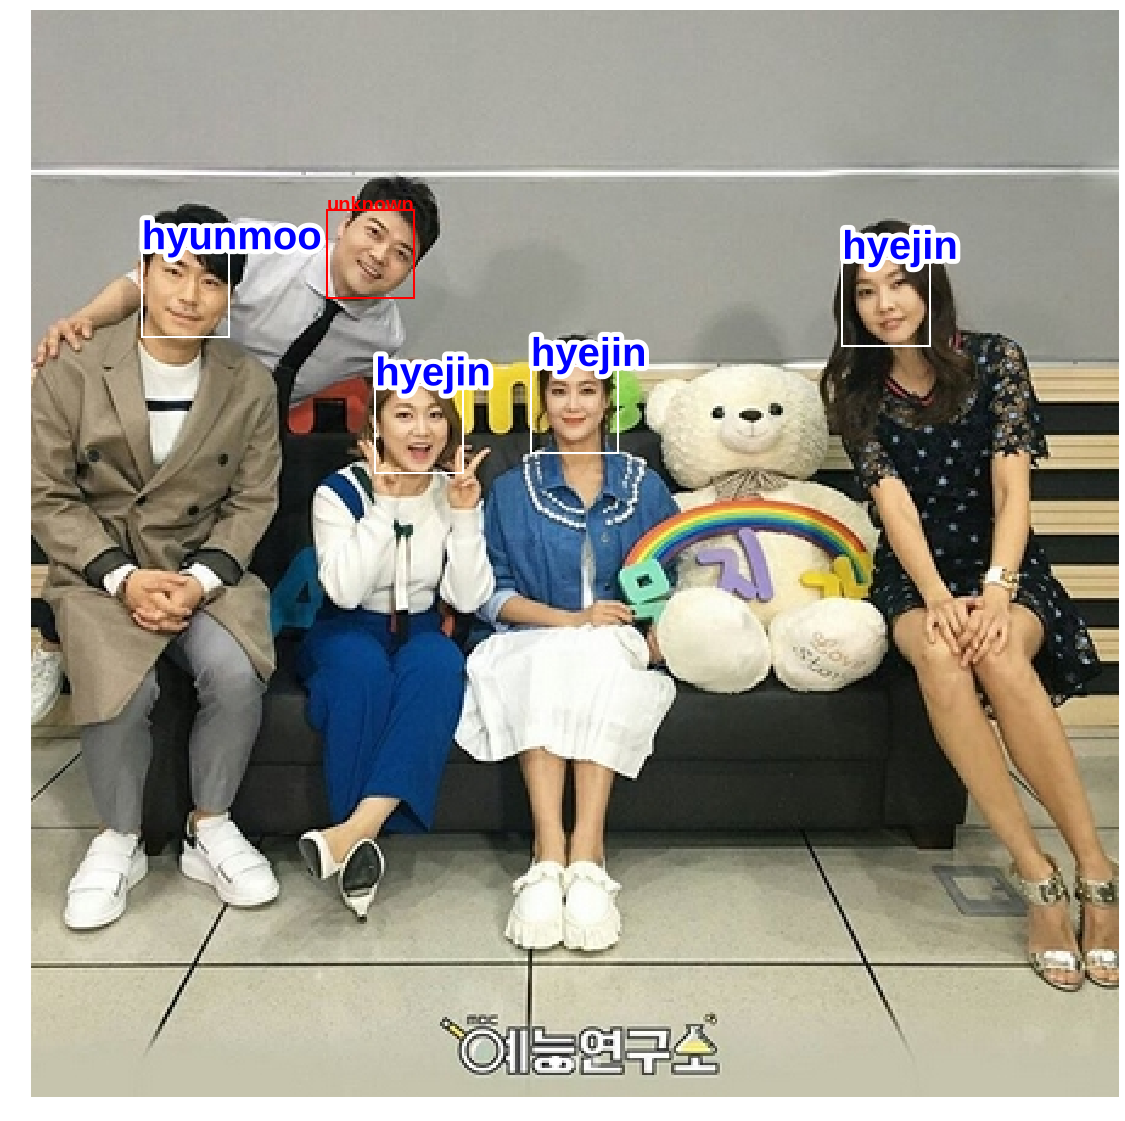

In [14]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img_rgb)

for i, desc in enumerate(descriptors):
    
    found = False
    for name, saved_desc in descs.items():
        dist = np.linalg.norm([desc] - saved_desc, axis=1)

        if dist < 0.6:
            found = True

            text = ax.text(rects[i][0][0], rects[i][0][1], name,
                    color='b', fontsize=40, fontweight='bold')
            text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='white'), path_effects.Normal()])
            rect = patches.Rectangle(rects[i][0],
                                 rects[i][1][1] - rects[i][0][1],
                                 rects[i][1][0] - rects[i][0][0],
                                 linewidth=2, edgecolor='w', facecolor='none')
            ax.add_patch(rect)

            break
    
    if not found:
        ax.text(rects[i][0][0], rects[i][0][1], 'unknown',
                color='r', fontsize=20, fontweight='bold')
        rect = patches.Rectangle(rects[i][0],
                             rects[i][1][1] - rects[i][0][1],
                             rects[i][1][0] - rects[i][0][0],
                             linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.axis('off')
plt.savefig('output.png')
plt.show()